# Tarea 2 Análisis de datos - Regresión Lineal Simple

Referencia: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-202


Para la segunda tarea, utilizaremos el mismo conjunto de datos para realizar una regresión lineal simple. En este análisis, identificaremos y seleccionaremos las variables adecuadas para x e y, con el objetivo de explorar la relación entre ellas y obtener un modelo predictivo basado en los datos proporcionados.

In [146]:
import pandas as pd
import numpy as np
import requests
import zipfile
import io
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler

import joblib
import warnings

warnings.filterwarnings("ignore")
%matplotlib notebook
%matplotlib inline

In [147]:
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-CambioClimatico/refs/heads/main/output/temperatura_dmc/2023/2023_temperatura_dmc.csv'
df = pd.read_csv(url)
df

,time,latitud,longitud,Ts_Valor,CodigoNacional,nombreEstacion
0,2023-01-01 01:00:00,-18.35555,-70.34028,20.0,180005.0,"Chacalluta, Arica Ap."
1,2023-01-01 02:00:00,-18.35555,-70.34028,20.3,180005.0,"Chacalluta, Arica Ap."
2,2023-01-01 03:00:00,-18.35555,-70.34028,20.5,180005.0,"Chacalluta, Arica Ap."
3,2023-01-01 04:00:00,-18.35555,-70.34028,20.4,180005.0,"Chacalluta, Arica Ap."
4,2023-01-01 05:00:00,-18.35555,-70.34028,19.8,180005.0,"Chacalluta, Arica Ap."
...,...,...,...,...,...,...
311678,2023-09-29 03:00:00,-62.19194,-58.97972,-3.0,950001.0,"C.M.A. Eduardo Frei Montalva, Antártica"
311679,2023-09-29 04:00:00,-62.19194,-58.97972,-2.9,950001.0,"C.M.A. Eduardo Frei Montalva, Antártica"
311680,2023-09-29 05:00:00,-62.19194,-58.97972,-2.8,950001.0,"C.M.A. Eduardo Frei Montalva, Antártica"
311681,2023-09-29 06:00:00,-62.19194,-58.97972,-2.7,950001.0,"C.M.A. Eduardo Frei Montalva, Antártica"


In [148]:
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-CambioClimatico/refs/heads/main/output/temperatura_dmc/2020/2020_temperatura_dmc.csv'
df = pd.read_csv(url)
df.nombreEstacion.unique()

array(['Chacalluta, Arica Ap.', 'Putre', 'Diego Aracena Iquique Ap.',
       'El Loa, Calama Ad.', 'Mataveri  Isla de Pascua Ap.',
       'Desierto de Atacama, Caldera  Ad.',
       'Copiapó Universidad de Atacama', 'Freirina Nicolasa',
       'La Florida, La Serena Ad.', 'Vicuña, Parque Los Pimientos',
       'Liceo Samuel Román Rojas (Combarbalá)',
       'San Felipe Escuela Agrícola', 'Viña del Mar  Ad. (Torquemada)',
       'Los Libertadores', 'Rodelillo, Ad.',
       'Eulogio Sánchez, Tobalaba Ad.', 'Quinta Normal, Santiago',
       'Pudahuel Santiago ', 'Santo Domingo, Ad.',
       'Juan Fernández, Estación Meteorológica.', 'El Colorado',
       'Lo Prado Cerro San Francisco', 'San José  Guayacán', 'El Paico',
       'General Freire, Curicó Ad.', 'Rancagua',
       "General Bernardo O'Higgins, Chillán Ad.",
       'Carriel Sur, Concepción Ap.', 'Termas de Chillán',
       'Retiro Copihue', 'María Dolores, Los Angeles Ad.',
       'Maquehue, Temuco Ad.', 'La Araucanía Ad.', 'Victo

In [149]:
def getTempDMC_y(est, y_i, y_e):
    for y in range(y_i, y_e+1, 1):
        url = f'https://raw.githubusercontent.com/MinCiencia/Datos-CambioClimatico/refs/heads/main/output/temperatura_dmc/{str(y)}/{str(y)}_temperatura_dmc.csv'
        if y==y_i:
            df = pd.read_csv(url)
            df = df[df.nombreEstacion==est]
        else:
            df_ = pd.read_csv(url)
            df_ = df_[df_.nombreEstacion==est]
            df = pd.concat([df, df_])
    df['time'] = pd.to_datetime(df['time'])
    df['CodigoNacional'] = df['CodigoNacional'].astype(str)
    return df

In [150]:
df = getTempDMC_y('Quinta Normal, Santiago', 2020, 2023)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32777 entries, 122940 to 106865
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            32777 non-null  datetime64[ns]
 1   latitud         32777 non-null  float64       
 2   longitud        32777 non-null  float64       
 3   Ts_Valor        32774 non-null  float64       
 4   CodigoNacional  32777 non-null  object        
 5   nombreEstacion  32777 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.8+ MB


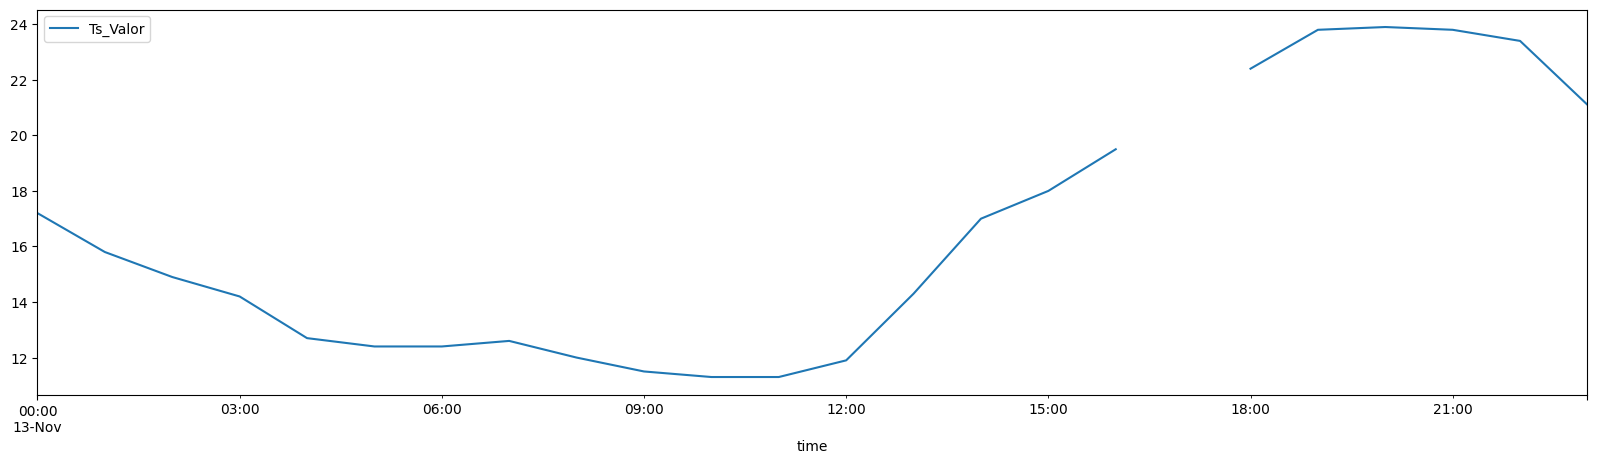

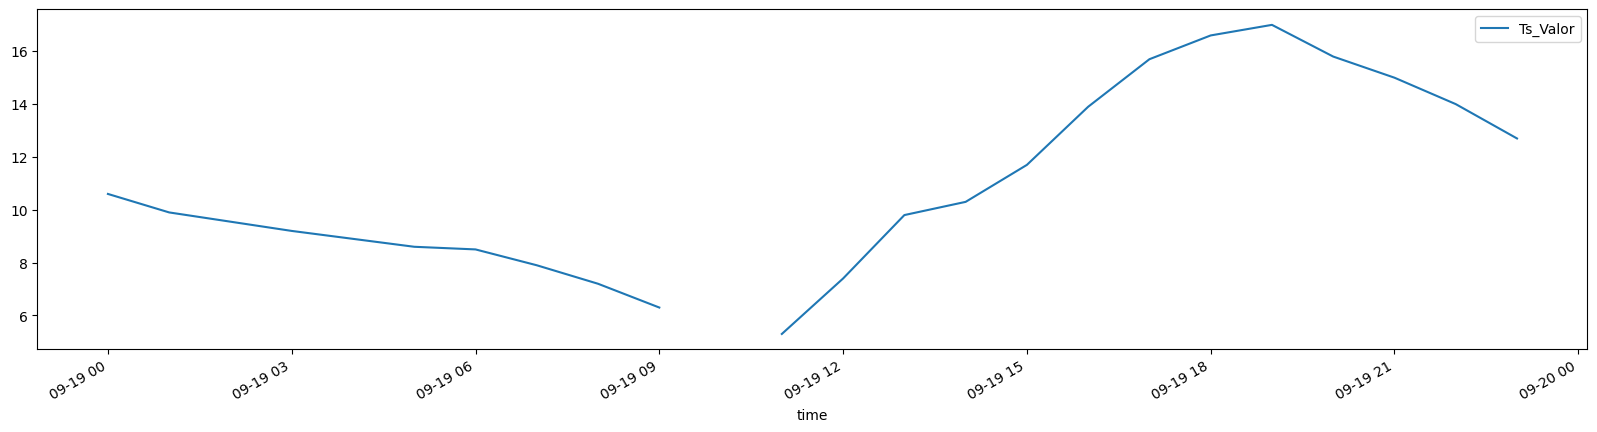

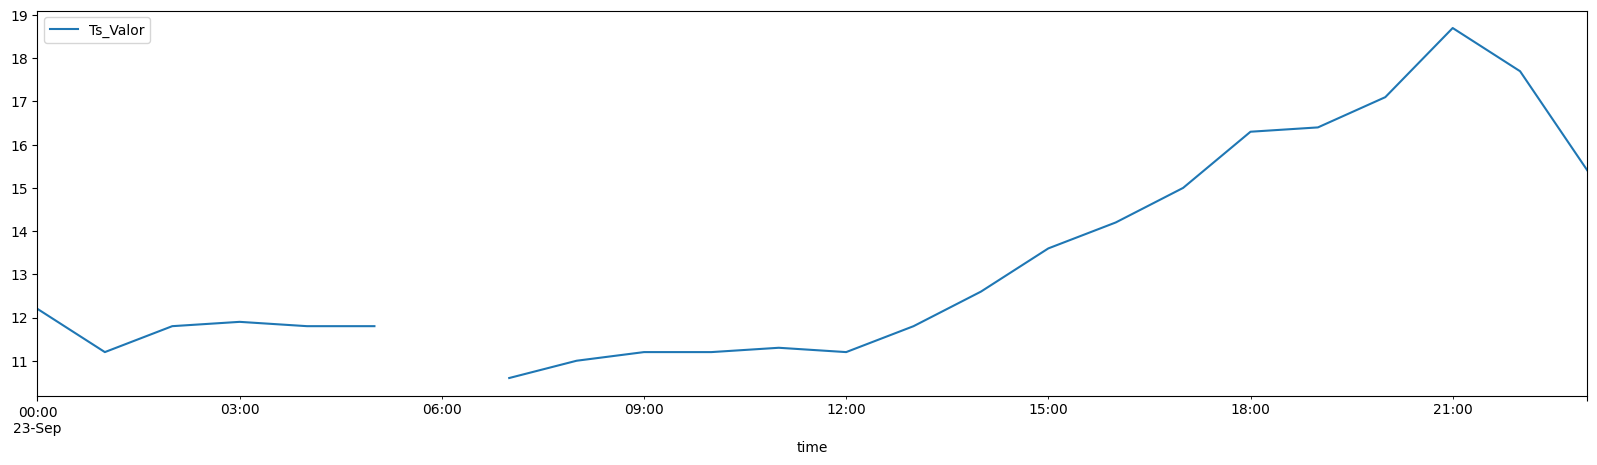

In [152]:
for d in df[df.Ts_Valor.isna()].time.dt.strftime('%Y-%m-%d'):
    df[df.time.dt.date == pd.to_datetime(d).date()].plot(x='time', y='Ts_Valor', figsize=(20,5));

In [153]:
Temp_na = df[df.Ts_Valor.isna()].time

In [154]:
def Temp_NA_impute(df, t_temp_na):
    temp1 = df[df.time == (t_temp_na + datetime.timedelta(hours=1))].Ts_Valor
    temp2 = df[df.time == (t_temp_na + datetime.timedelta(hours=-1))].Ts_Valor
    return np.mean(pd.concat([temp1, temp2]))

In [155]:
for t in Temp_na:
    df['Ts_Valor'][df.time == t] = Temp_NA_impute(df, t)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32777 entries, 122940 to 106865
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            32777 non-null  datetime64[ns]
 1   latitud         32777 non-null  float64       
 2   longitud        32777 non-null  float64       
 3   Ts_Valor        32777 non-null  float64       
 4   CodigoNacional  32777 non-null  object        
 5   nombreEstacion  32777 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.8+ MB


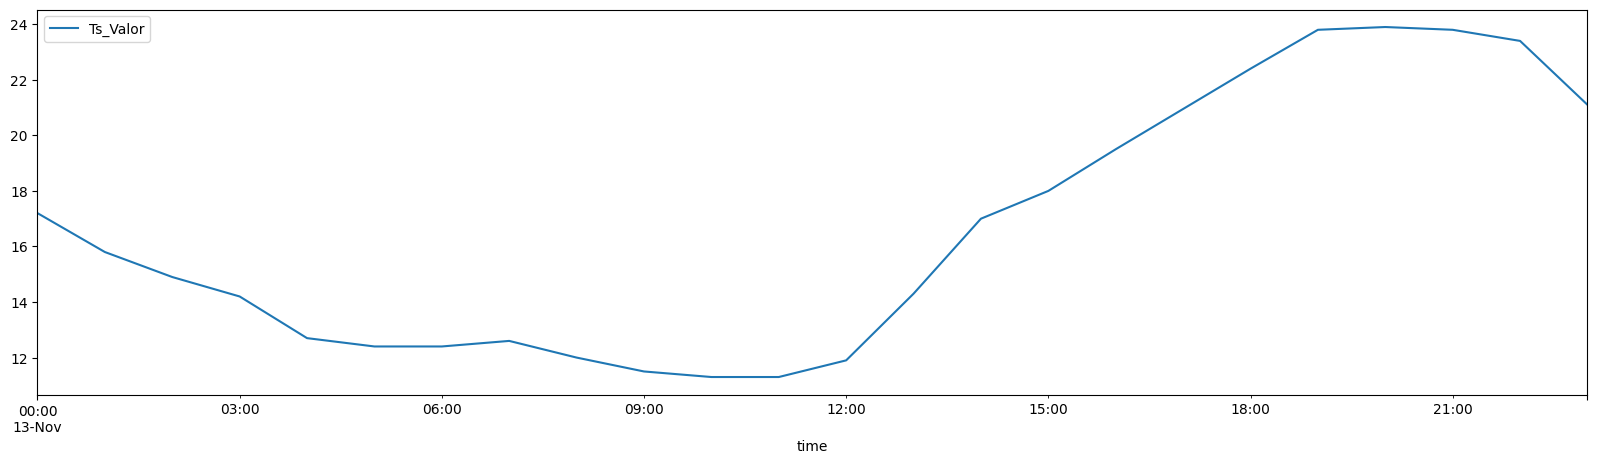

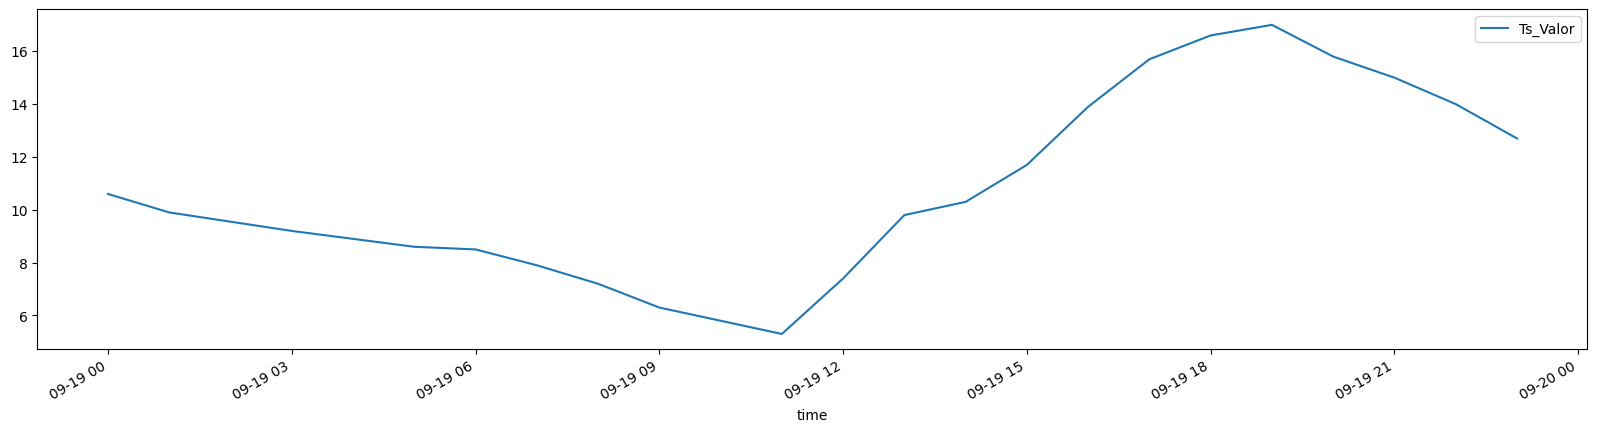

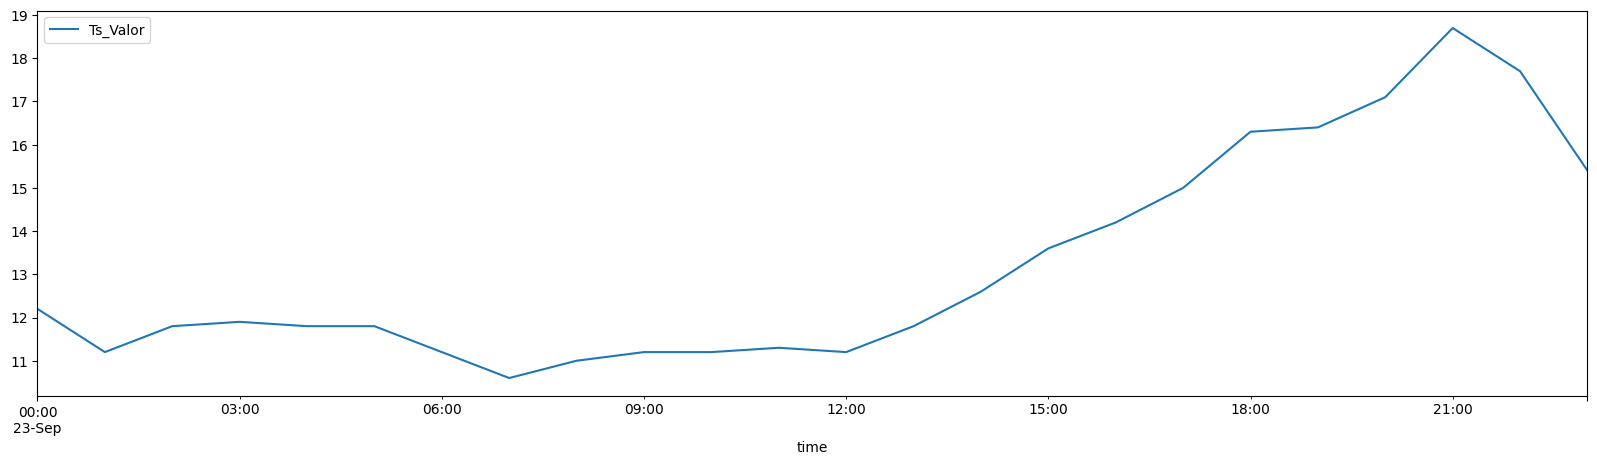

In [156]:
for d in Temp_na.dt.strftime('%Y-%m-%d'):
    df[df.time.dt.date == pd.to_datetime(d).date()].plot(x='time', y='Ts_Valor', figsize=(20,5));

<Axes: xlabel='time'>

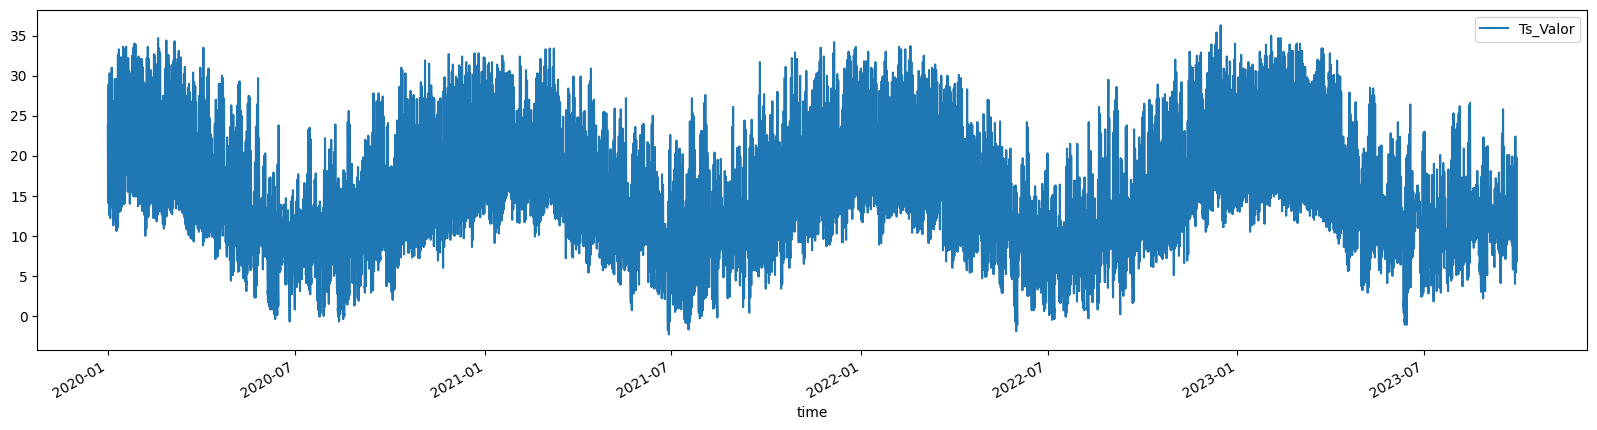

In [157]:
# 4 años
df[['time', 'Ts_Valor']].plot(x='time', y='Ts_Valor', figsize=(20,5))

<Axes: xlabel='time'>

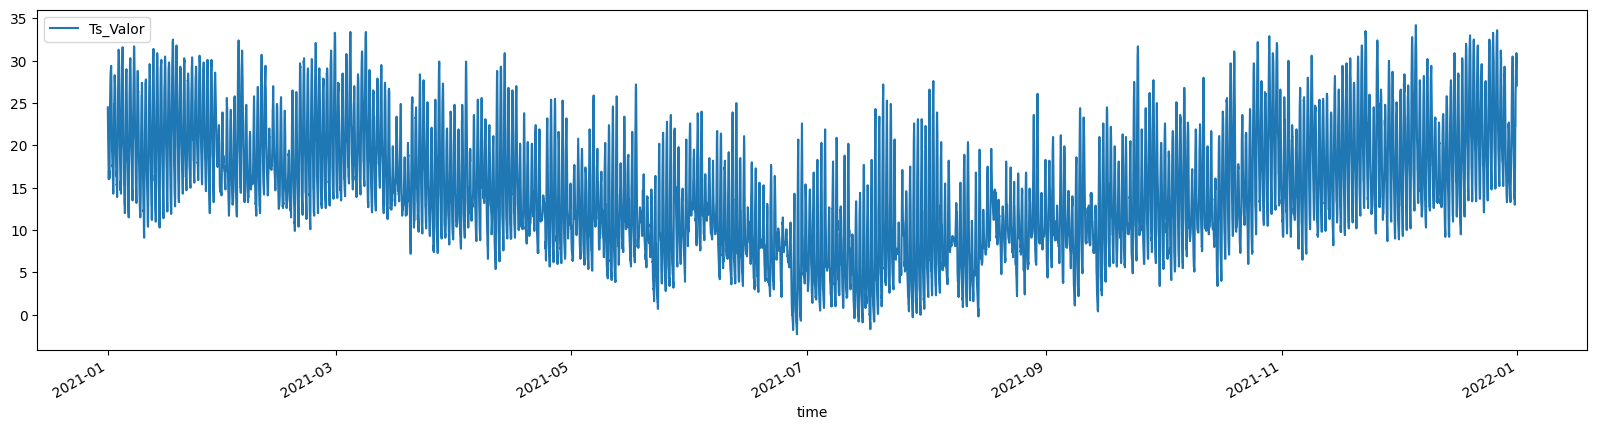

In [158]:
# 1 año
df[(df['time'] >= '2021-01-01') & (df['time'] < '2022-01-01')].plot(x='time', y='Ts_Valor', figsize=(20,5))

<Axes: xlabel='time'>

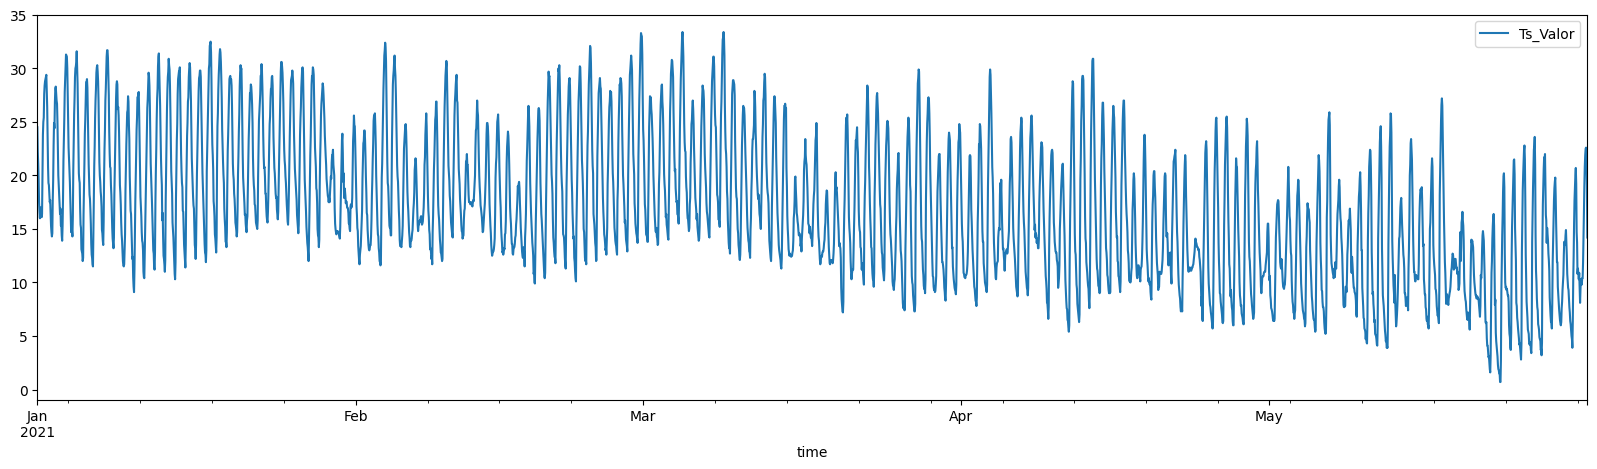

In [159]:
# 6 meses
df[(df['time'] >= '2021-01-01') & (df['time'] < '2021-06-01')].plot(x='time', y='Ts_Valor', figsize=(20,5))

<Axes: xlabel='time'>

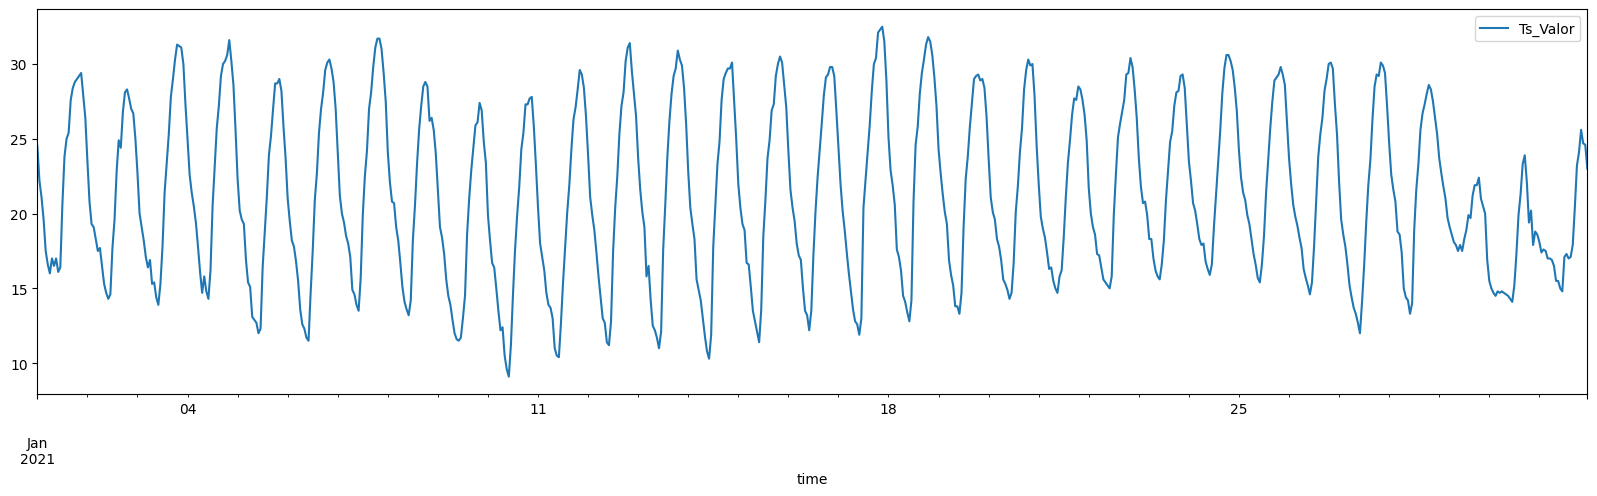

In [160]:
# 1 mes
df[(df['time'] >= '2021-01-01') & (df['time'] < '2021-02-01')].plot(x='time', y='Ts_Valor', figsize=(20,5))

<Axes: xlabel='time'>

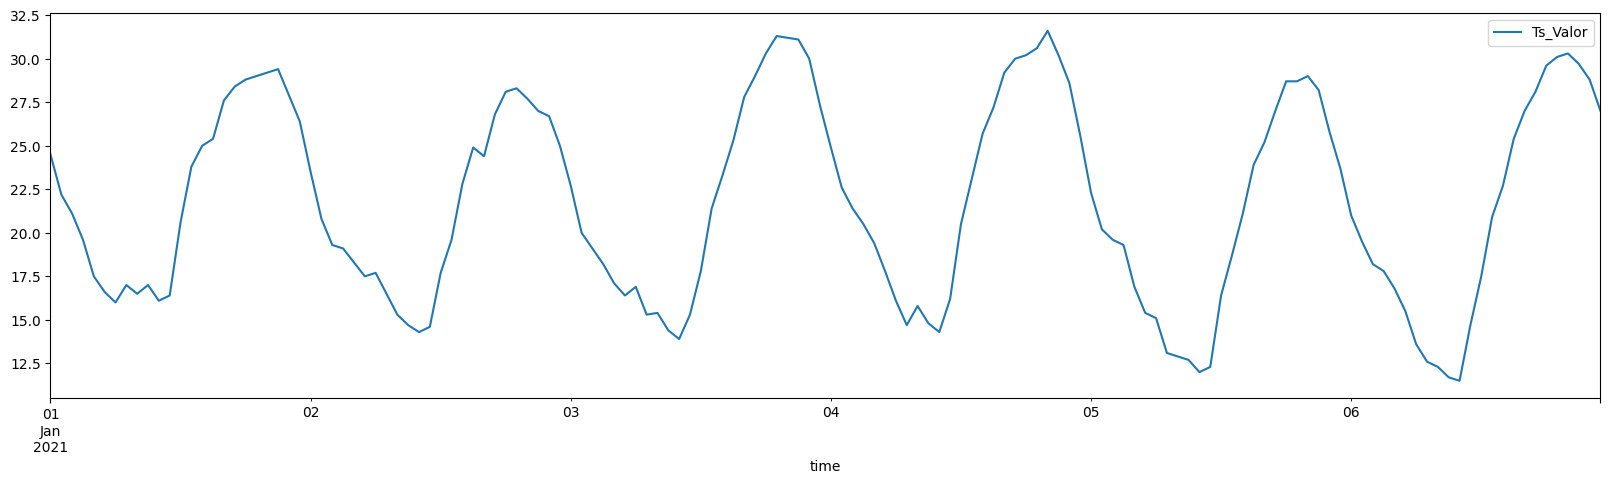

In [161]:
# 1 semana
df[(df['time'] >= '2021-01-01') & (df['time'] < '2021-01-07')].plot(x='time', y='Ts_Valor', figsize=(20,5))

<Axes: xlabel='time'>

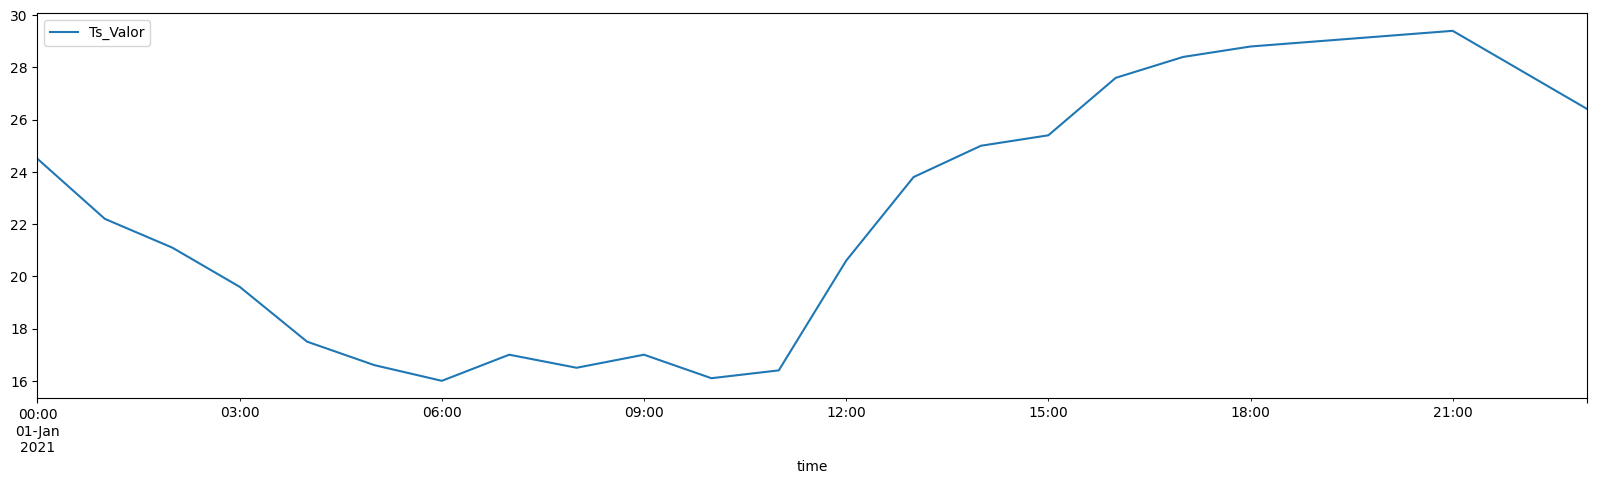

In [162]:
# 1 dia
df[df.time.dt.date == pd.to_datetime('2021-01-01').date()].plot(x='time', y='Ts_Valor', figsize=(20,5))